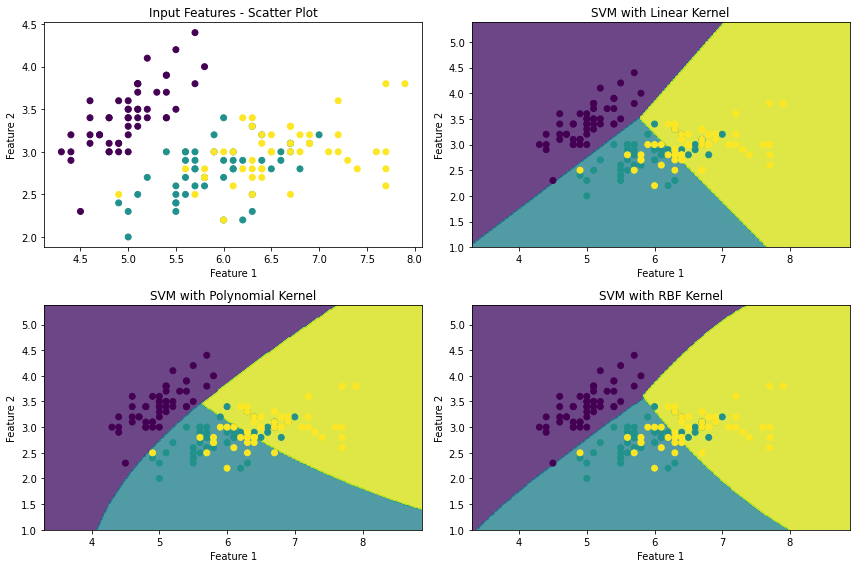

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)  
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Input Features - Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

def plot_decision_boundary(model, title):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)
plot_decision_boundary(svm_linear, 'SVM with Linear Kernel')

plt.subplot(2, 2, 3)
plot_decision_boundary(svm_poly, 'SVM with Polynomial Kernel')

plt.subplot(2, 2, 4)
plot_decision_boundary(svm_rbf, 'SVM with RBF Kernel')

plt.tight_layout()
plt.show()
